# Individual Coding Assignment 1/31

I'll be working with data from CalEnviroScreen (CES), which looks at the impact of energy production on communities across California.

First I'll import pandas, geopandas, contextily, and pyplot so that I have all the tools I need. Then I'll load the income data I got from CalEnviroScreen as a shapefile.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file('CES2018 data/CES3June2018Update.shp')

In [3]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

The data loaded (though it took me a while to figure this step out!). It's a geodataframe. I'll use the head() and info() commands to look at the data.

In [4]:
gdf.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,ozone,...,Native_Ame,Asian_Amer,Other_pct,OBJECTID_1,CIdecile,CIvigintil,Shape_Leng,Shape_Area,CES2018_Rn,geometry
0,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,0.035,...,0.5,7.2,1.6,3507,6,12,6999.357622,2.847611e+06,55-60%,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,0.035,...,0.2,5.5,1.6,2733,7,14,19100.578003,1.635292e+07,65-70%,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,0.035,...,0.5,2.9,2.6,4689,5,9,4970.985933,1.352330e+06,40-45%,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2,0.035,...,0.6,4.0,2.6,7864,1,1,6558.956142,2.417717e+06,1-5% (lowest scores),"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3,0.035,...,0.8,3.5,3.2,7863,1,1,6570.368642,2.608422e+06,1-5% (lowest scores),"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


71 columns is a lot. I'll probably just want to keep some of those, so I'll pare it down a bit. To do that, I need to know what all the columns are. I'll use the info() command to show me the full list of columns.

In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 71 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tract       8035 non-null   float64 
 1   pop2010     8035 non-null   int64   
 2   California  8035 non-null   object  
 3   ZIP         8035 non-null   int64   
 4   City        8035 non-null   object  
 5   Longitude   8035 non-null   float64 
 6   Latitude    8035 non-null   float64 
 7   CIscore     8035 non-null   float64 
 8   CIscoreP    8035 non-null   int64   
 9   ozone       8035 non-null   float64 
 10  ozoneP      8035 non-null   int64   
 11  pm          8035 non-null   float64 
 12  pmP         8035 non-null   int64   
 13  diesel      8035 non-null   float64 
 14  dieselP     8035 non-null   int64   
 15  drink       8035 non-null   float64 
 16  drinkP      8035 non-null   int64   
 17  pest        8035 non-null   float64 
 18  pestP       8035 non-null   int64   
 19

I'm not sure what a lot of these are, though I think I know which ones I'll need. I need a fuller list of columns to be sure.

In [6]:
gdf.columns.to_list()

['tract',
 'pop2010',
 'California',
 'ZIP',
 'City',
 'Longitude',
 'Latitude',
 'CIscore',
 'CIscoreP',
 'ozone',
 'ozoneP',
 'pm',
 'pmP',
 'diesel',
 'dieselP',
 'drink',
 'drinkP',
 'pest',
 'pestP',
 'RSEIhaz',
 'RSEIhazP',
 'traffic',
 'trafficP',
 'cleanups',
 'cleanupsP',
 'gwthreats',
 'gwthreatsP',
 'haz',
 'hazP',
 'iwb',
 'iwbP',
 'swis',
 'swisP',
 'Pollution',
 'PollutionS',
 'PollutionP',
 'asthma',
 'asthmaP',
 'lbw',
 'lbwP',
 'cvd',
 'cvdP',
 'edu',
 'eduP',
 'ling',
 'lingP',
 'pov',
 'povP',
 'unemp',
 'unempP',
 'housingB',
 'housingBP',
 'PopChar',
 'PopCharSco',
 'PopCharP',
 'Children_u',
 'Pop_11_64_',
 'Elderly_ov',
 'Hispanic_p',
 'White_pct',
 'African_Am',
 'Native_Ame',
 'Asian_Amer',
 'Other_pct',
 'OBJECTID_1',
 'CIdecile',
 'CIvigintil',
 'Shape_Leng',
 'Shape_Area',
 'CES2018_Rn',
 'geometry']

This still doesn't tell me much. I have an Excel version of the data so I know what the columns are. I guess if I didn't know them already I would have to import the metadata as well?

Anyway, let's see what a plot of this data looks like. I'm concerned it'll be too much data to make sense of so I might have to cut things down to make it work.

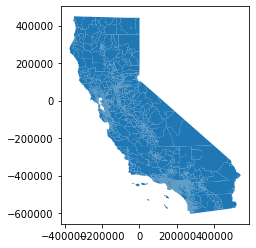

In [7]:
gdf.plot()

Okay, so it's just a map of the state. Let me plot it by a particular column and see how that looks.

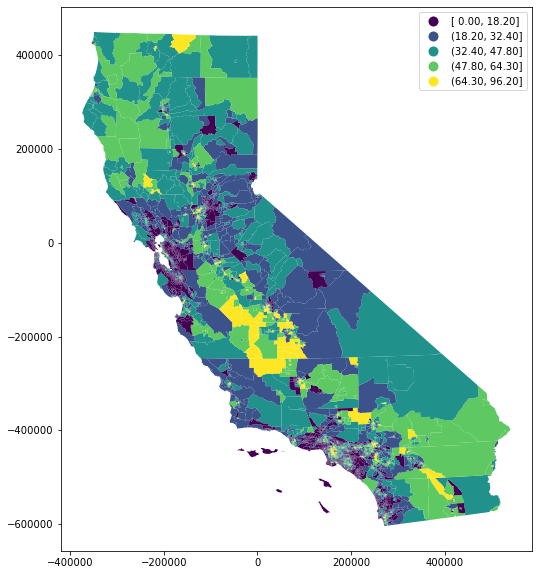

In [8]:
gdf.plot(figsize=(12,10),
                 column='pov',
                 legend=True, 
                 scheme='NaturalBreaks')

The areas with the highest concentrations of poverty are almost all in the central valley and Southern CA. I want to compare this plot to educational attainment, so I'll create two maps side-by-side.

Text(0.5, 1.0, 'Percentage of population with less than high school degree')

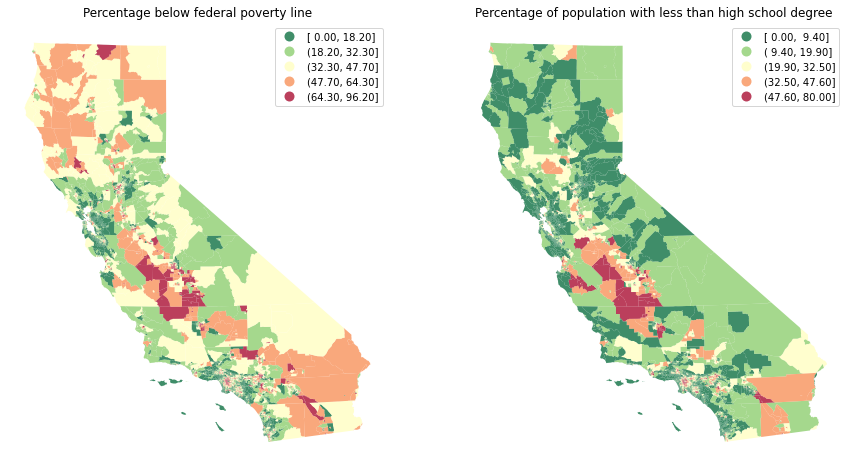

In [9]:
# First I'll create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# Then name each subplot
ax1, ax2 = axs

# Recreate my poverty map on the left
gdf.plot(column='pov', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")

# I'll title the plot
ax1.set_title("Percentage below federal poverty line")

# Create a map of educational attainment on the right
gdf.plot(column='edu', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")

# Then title the second plot
ax2.set_title("Percentage of population with less than high school degree")

The areas of overlap in this map aren't particularly surprising. One interesting trend that I didn't expect was to see such a divergence between educational attainment and poverty levels in areas of Northern California.

I'm going to narrow the dataset down to just the columns I'm interested in. The CES data has a lot of environmental indicators and other indices. I'm not so interested in those for right now, so I'm going to make the table only a few columns.

In [10]:
desired_columns = ['tract', 'pop2010', 'California', 'ZIP', 'City', 'CIscore', 'edu', 'pov', 
                  'unemp']

Checking to see it worked...

In [11]:
print(desired_columns)

['tract', 'pop2010', 'California', 'ZIP', 'City', 'CIscore', 'edu', 'pov', 'unemp']


Good, now I'll create a new dataframe with just these columns. 

In [12]:
gdf_trim = gdf[desired_columns].copy()
gdf_trim

,tract,pop2010,California,ZIP,City,CIscore,edu,pov,unemp
0,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,29.51,24.8,62.0,7.3
1,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,33.17,46.0,56.7,10.6
2,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,22.85,26.2,33.5,4.1
3,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,4.45,6.1,9.7,8.9
4,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,5.28,12.1,23.8,7.3
...,...,...,...,...,...,...,...,...,...
8030,6.037430e+09,5837,Los Angeles,91016,Monrovia,18.15,4.7,20.3,8.8
8031,6.037431e+09,4118,Los Angeles,91007,Arcadia,15.61,4.5,23.6,10.2
8032,6.037431e+09,6629,Los Angeles,91016,Monrovia,40.08,21.4,44.1,9.2
8033,6.037534e+09,6617,Los Angeles,90201,Bell,57.85,53.6,66.6,12.5


Everything looks right! I'm going to add a basemap to this data using Contextily. First I have to reproject the geodata to Web Mercator.

In [13]:
gdf_trim_web_mercator = gdf.to_crs(epsg=3857)

Then I just want to check that it worked.

In [14]:
gdf_trim_web_mercator.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,ozone,...,Native_Ame,Asian_Amer,Other_pct,OBJECTID_1,CIdecile,CIvigintil,Shape_Leng,Shape_Area,CES2018_Rn,geometry
0,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,0.035,...,0.5,7.2,1.6,3507,6,12,6999.357622,2.847611e+06,55-60%,"POLYGON ((-13406867.403 4155533.467, -13404832..."
1,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,0.035,...,0.2,5.5,1.6,2733,7,14,19100.578003,1.635292e+07,65-70%,"POLYGON ((-13406867.403 4155533.467, -13406866..."
2,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,0.035,...,0.5,2.9,2.6,4689,5,9,4970.985933,1.352330e+06,40-45%,"POLYGON ((-13404823.800 4156507.697, -13404832..."
3,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2,0.035,...,0.6,4.0,2.6,7864,1,1,6558.956142,2.417717e+06,1-5% (lowest scores),"POLYGON ((-13403840.848 4147463.430, -13403731..."
4,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3,0.035,...,0.8,3.5,3.2,7863,1,1,6570.368642,2.608422e+06,1-5% (lowest scores),"POLYGON ((-13406428.470 4147490.027, -13404940..."


Now I want to plot the data using a basemap. I want to look at the areas with the highest poverty rates again (mostly to check I'm doing it right).

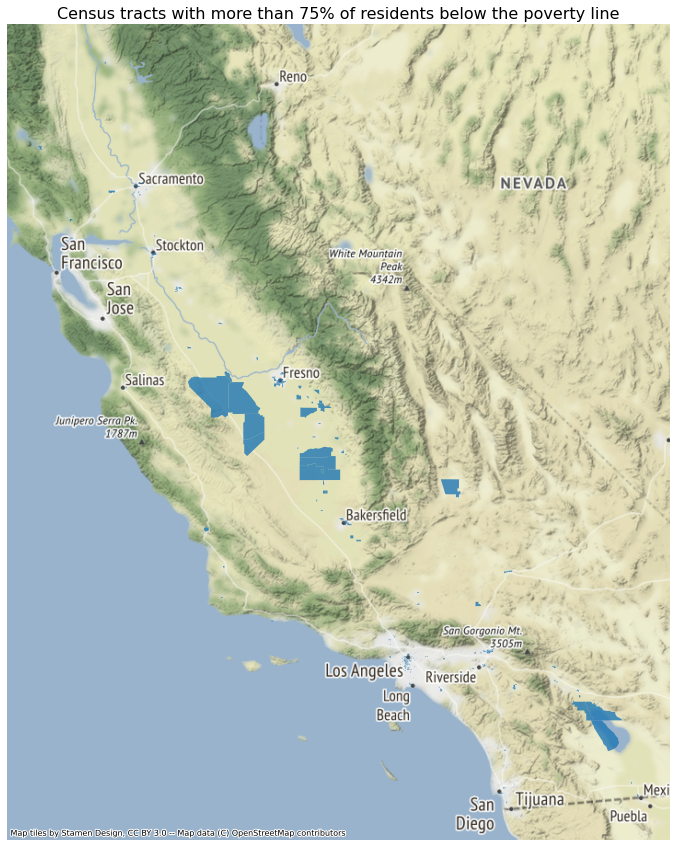

In [16]:
# Create subplots
fig, ax = plt.subplots(figsize=(15, 15))

# Add the layer with ax=ax in the argument 
gdf_trim_web_mercator[gdf_trim_web_mercator['pov'] > 75].plot(ax=ax, alpha=0.8)

# Turn the axis off
ax.axis('off')

# Set a title
ax.set_title('Census tracts with more than 75% of residents below the poverty line',fontsize=16)

# Finally, add a basemap
ctx.add_basemap(ax)

That's about what I saw in my other maps earlier. How many census tracts is this? To find this out, I need to create a new variable.

In [17]:
gdf_trim_highpov = gdf_trim[gdf_trim['pov'] > 75]

I created the variable to select all counties with a poverty rate above 75%. I want the program to read it out in a sentence:

In [18]:
print('There are ' + str(len(gdf_trim_highpov)) + ' census tracts with more than 75% of residents above the poverty line')

There are 301 census tracts with more than 75% of residents above the poverty line


I wonder if there's a relationship between poverty levels and educational attainment. Let me try plotting them.

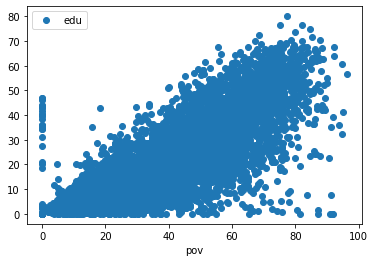

In [19]:
gdf_trim.plot(x='pov', y='edu', style='o')

Eh, looks like there's a loose correlation but it's not really meaningful, at least from looking at this graph. Maybe instead I'll just look at the distribution of the data across the full dataframe using describe().

In [20]:
gdf['pov'].describe()

count    8035.000000
mean       36.029035
std        20.533097
min         0.000000
25%        18.900000
50%        33.200000
75%        51.400000
max        96.200000
Name: pov, dtype: float64

Wow, the average census tract in CA has 36% of residents living below the federal poverty line. That's terrible.

And now a histogram...

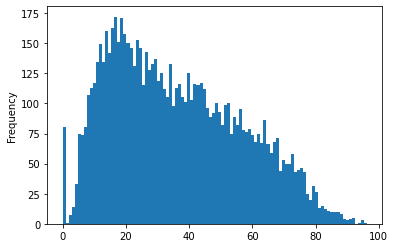

In [21]:
gdf['pov'].plot.hist(bins=100)

The histogram is right-skewed, so there are a lot more census tracts with lower poverty levels than there are with high levels. Still, it looks like about 20% of residents in a plurality of census tracts in CA are living below the federal poverty line.